# Objective weighting methods for MCDM
This manual explains software that provides the library for multi-criteria decision-making using objective weighting methods. This library contains weighting methods:
1. Equal
2. Entropy
3. Standard deviation
4. CRITIC
5. Gini coefficient-based
6. MEREC
7. Statistical variance
8. CILOS
9. IDOCRIW
10. Angle
11. Coefficient of variance

The TOPSIS method

Normalization techniques:
1. Linear
2. Minimum-Maximum
3. Maximum
4. Sum
5. Vector

Correlation coefficients:
1. Spearman rank correlation coefficient rs
2. Weighted Spearman rank correlation coefficient rw
3. Rank similarity coefficient WS
4. Pearson coefficent
5. Kendall rank correlation coefficient
6. Goodman Kruskal rank correlation coefficient

Visualization methods

Import the necessary libraries and modules.

In [1]:
import numpy as np
import pandas as pd
from correlations import *
from create_dictionary import *
from normalizations import *
from rank_preferences import *
from weighting_methods import *
from topsis import TOPSIS
from visualizations import *

As an illustrative example, a dataset will be used containing performances of the twelve best-selling electric cars in 2021 according to a ranking available at https://www.caranddriver.com/features/g36278968/best-selling-evs-of-2021/ The dataset is displayed below. A1-A12 are the individual alternatives in rows, columns C1-C11 denote the criteria, and the Type row contains the criteria type, where 1 indicates a profit criterion (stimulant) and -1 a cost criterion (destimulant).

In [2]:
data_presentation = pd.read_csv('input/electric_cars_2021.csv', index_col = 'Ai')
data_presentation

,Name,C1 Max speed [mph],C2 Battery [kWh],C3 Electric motor [kW] Front,C4 Torque [Nm] Front,C5 Mechanical horsepower [hp],C6 EPA Fuel Economy Combined [MPGe],C7 EPA Fuel Economy City [MPGe],C8 EPA Fuel Economy Highway [MPGe],C9 EPA range [miles],"C10 Turning Diameter / Radius, curb to curb [feet]",C11 Base price [$]
Ai,,,,,,,,,,,,
A1,Tesla Model Y,155.3,74.0,340,673,456.0,111,115,106,244,39.8,65440
A2,Tesla Model 3,162.2,79.5,247,639,283.0,113,118,107,263,38.8,60440
A3,Ford Mustang Mach-E,112.5,68.0,198,430,266.0,98,105,91,230,38.1,56575
A4,Chevrolet Bolt EV and EUV,90.1,66.0,150,360,201.2,120,131,109,259,34.8,32495
A5,Volkswagen ID.4,99.4,77.0,150,310,201.2,97,102,90,260,36.4,45635
A6,Nissan Leaf,89.5,40.0,110,320,147.5,111,123,99,226,34.8,28425
A7,Audi e-tron and e-tron Sportback,124.3,95.0,125,247,187.7,78,78,77,222,40.0,84595
A8,Porsche Taycan,155.3,79.2,160,300,214.6,79,79,80,227,38.4,105150
A9,Tesla Model S,162.2,100.0,205,420,502.9,120,124,115,402,40.3,96440


Load a decision matrix containing only the performance values of the alternatives against the criteria and the criteria type in the last row, as shown below.

In [3]:
filename = 'input/dataset_cars.csv'
data = pd.read_csv(filename, index_col = 'Ai')
df_data = data.iloc[:len(data) - 1, :]
types = data.iloc[len(data) - 1, :].to_numpy()
list_alt_names = [r'$A_{' + str(i) + '}$' for i in range(1, df_data.shape[0] + 1)]
cols = [r'$C_{' + str(j) + '}$' for j in range(1, data.shape[1] + 1)]
print('Decision matrix')
df_data

Decision matrix


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
Ai,,,,,,,,,,,
A1,155.3,74.0,340,673,456.0,111,115,106,244,39.8,65440
A2,162.2,79.5,247,639,283.0,113,118,107,263,38.8,60440
A3,112.5,68.0,198,430,266.0,98,105,91,230,38.1,56575
A4,90.1,66.0,150,360,201.2,120,131,109,259,34.8,32495
A5,99.4,77.0,150,310,201.2,97,102,90,260,36.4,45635
A6,89.5,40.0,110,320,147.5,111,123,99,226,34.8,28425
A7,124.3,95.0,125,247,187.7,78,78,77,222,40.0,84595
A8,155.3,79.2,160,300,214.6,79,79,80,227,38.4,105150
A9,162.2,100.0,205,420,502.9,120,124,115,402,40.3,96440


In [4]:
print('Criteria types')
types

Criteria types


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.])

Transform the decision matrix and criteria type from dataframe to NumPy array. Then calculate the weights with the selected weighing method. In this case, the Entropy weighting method (entropy_weighting) is selected.

In [5]:
matrix = df_data.to_numpy()
weights = entropy_weighting(matrix, types)
df_weights = pd.DataFrame(weights.reshape(1, -1), index = ['Weights'], columns = cols)
df_weights

,$C_{1}$,$C_{2}$,$C_{3}$,$C_{4}$,$C_{5}$,$C_{6}$,$C_{7}$,$C_{8}$,$C_{9}$,$C_{10}$,$C_{11}$
Weights,0.057741,0.099843,0.142673,0.096488,0.236087,0.024544,0.032432,0.018126,0.053958,0.003863,0.234244


Use the TOPSIS method to determine the value of the preference function (pref) and the ranking of alternatives (rank). The TOPSIS method ranks alternatives descending according to preference function values, so the reverse parameter in the rank_preferences method is set to True.

In [6]:
topsis = TOPSIS()
pref = topsis(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
df_results = pd.DataFrame(index = list_alt_names)
df_results['Pref'] = pref
df_results['Rank'] = rank
df_results

,Pref,Rank
$A_{1}$,0.743500,1
$A_{2}$,0.579304,3
$A_{3}$,0.498361,5
$A_{4}$,0.489181,6
$A_{5}$,0.455907,7
$A_{6}$,0.439309,8
$A_{7}$,0.328204,11
$A_{8}$,0.284612,12
$A_{9}$,0.605951,2
$A_{10}$,0.422750,9


The second part of the manual contains codes for benchmarking against several different criteria weighting methods. List the weighting methods you wish to explore.

In [7]:
weighting_methods = [
    entropy_weighting,
    #std_weighting,
    critic_weighting,
    gini_weighting,
    merec_weighting,
    stat_var_weighting,
    #cilos_weighting,
    idocriw_weighting,
    angle_weighting,
    coeff_var_weighting
]

Below is a loop with code to collect results for each weighting technique. Then display the results, namely weights, preference function values and rankings.

In [8]:
df_weights = pd.DataFrame(index = cols)
df_preferences = pd.DataFrame(index = list_alt_names)
df_rankings = pd.DataFrame(index = list_alt_names)

topsis = TOPSIS()

for weight_type in weighting_methods:
    weights = weight_type(matrix, types)
    df_weights[weight_type.__name__[:-10].upper()] = weights
    pref = topsis(matrix, weights, types)
    rank = rank_preferences(pref, reverse = True)
    df_preferences[weight_type.__name__[:-10].upper()] = pref
    df_rankings[weight_type.__name__[:-10].upper()] = rank

df_weights.to_csv('output/weights.csv')
df_preferences.to_csv('output/preferences.csv')
df_rankings.to_csv('output/ranks.csv')

In [9]:
df_weights

,ENTROPY,CRITIC,GINI,MEREC,STAT_VAR,IDOCRIW,ANGLE,COEFF_VAR
$C_{1}$,0.057741,0.093960,0.080882,0.067363,0.143855,0.089362,0.081732,0.079378
$C_{2}$,0.099843,0.099277,0.103800,0.125195,0.103976,0.076405,0.103002,0.101129
$C_{3}$,0.142673,0.066132,0.128202,0.103489,0.067308,0.094271,0.129702,0.129595
$C_{4}$,0.096488,0.075874,0.103200,0.093050,0.076665,0.079572,0.108379,0.106746
$C_{5}$,0.236087,0.071195,0.163513,0.124581,0.112880,0.154235,0.162354,0.166788
$C_{6}$,0.024544,0.112865,0.052308,0.064886,0.074361,0.071876,0.053145,0.051074
$C_{7}$,0.032432,0.120602,0.060388,0.077107,0.073925,0.076822,0.060739,0.058510
$C_{8}$,0.018126,0.103536,0.046188,0.053708,0.076150,0.069418,0.046061,0.044183
$C_{9}$,0.053958,0.065514,0.073099,0.087109,0.060565,0.039702,0.081691,0.079337
$C_{10}$,0.003863,0.098432,0.021151,0.018566,0.126025,0.017062,0.021711,0.020518


In [10]:
df_preferences

,ENTROPY,CRITIC,GINI,MEREC,STAT_VAR,IDOCRIW,ANGLE,COEFF_VAR
$A_{1}$,0.743500,0.605065,0.722482,0.674308,0.621768,0.702099,0.722418,0.723232
$A_{2}$,0.579304,0.621352,0.611433,0.624868,0.618751,0.629742,0.609621,0.607751
$A_{3}$,0.498361,0.418560,0.469204,0.491598,0.411205,0.520460,0.455747,0.463862
$A_{4}$,0.489181,0.569283,0.470574,0.533674,0.484681,0.566658,0.451935,0.461686
$A_{5}$,0.455907,0.425193,0.427876,0.483136,0.413119,0.501265,0.409391,0.419623
$A_{6}$,0.439309,0.475508,0.407233,0.458805,0.419818,0.518304,0.385137,0.398303
$A_{7}$,0.328204,0.303315,0.335828,0.377572,0.344956,0.338556,0.328246,0.328804
$A_{8}$,0.284612,0.333397,0.323884,0.327395,0.434035,0.303809,0.325290,0.320091
$A_{9}$,0.605951,0.632522,0.621735,0.609880,0.628959,0.573952,0.632738,0.625500
$A_{10}$,0.422750,0.527744,0.409568,0.465528,0.449329,0.517900,0.392039,0.401677


In [11]:
df_rankings

,ENTROPY,CRITIC,GINI,MEREC,STAT_VAR,IDOCRIW,ANGLE,COEFF_VAR
$A_{1}$,1,3,1,1,2,1,1,1
$A_{2}$,3,2,3,2,3,2,3,3
$A_{3}$,5,10,6,6,11,6,5,5
$A_{4}$,6,4,5,4,5,4,6,6
$A_{5}$,7,9,7,7,10,9,7,7
$A_{6}$,8,8,10,10,9,7,10,9
$A_{7}$,11,12,11,11,12,11,11,11
$A_{8}$,12,11,12,12,8,12,12,12
$A_{9}$,2,1,2,3,1,3,2,2
$A_{10}$,9,6,8,8,7,8,8,8


Visualize the results as column graphs of weights, rankings, and correlations.

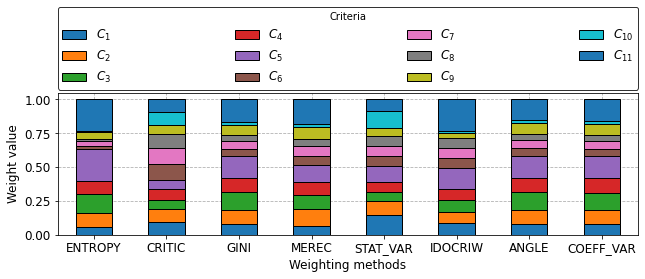

In [12]:
plot_barplot(df_weights, 'Weighting methods', 'Weight value', 'Criteria')

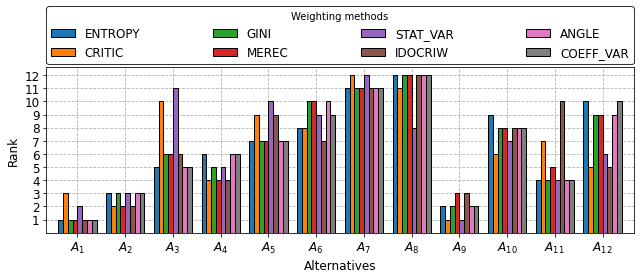

In [13]:
plot_barplot(df_rankings, 'Alternatives', 'Rank', 'Weighting methods')

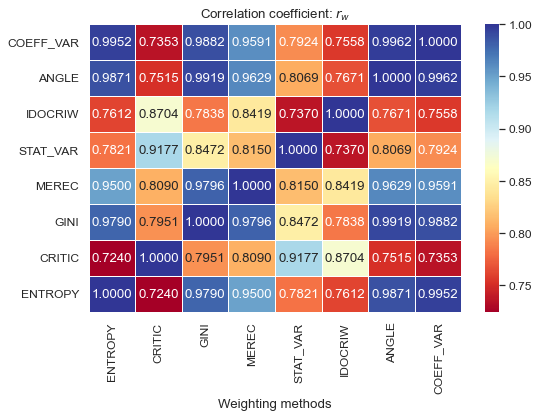

In [14]:
results = copy.deepcopy(df_rankings)
method_types = list(results.columns)
dict_new_heatmap_rw = Create_dictionary()

for el in method_types:
    dict_new_heatmap_rw.add(el, [])

# heatmaps for correlations coefficients
for i in method_types[::-1]:
    for j in method_types:
        dict_new_heatmap_rw[j].append(weighted_spearman(results[i], results[j]))

df_new_heatmap_rw = pd.DataFrame(dict_new_heatmap_rw, index = method_types[::-1])
df_new_heatmap_rw.columns = method_types

# correlation matrix with rw coefficient
draw_heatmap(df_new_heatmap_rw, r'$r_w$')